In [57]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib


In [64]:
# import in our data
df = pd.read_csv("Spotify2023.csv",  encoding='latin-1')
# filter out any non-numeric values and drop them as a row
df = df[df["streams"].apply(lambda x: x.isnumeric())]
print(df)

                              track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_pl

# Correlation between artist count & streams
## Do collaborations increase music popularity?


0      2
1      1
2      1
3      1
4      1
      ..
948    1
949    1
950    2
951    3
952    1
Name: artist_count, Length: 952, dtype: int64
0      141381703
1      133716286
2      140003974
3      800840817
4      303236322
         ...    
948     91473363
949    121871870
950     73513683
951    133895612
952     96007391
Name: streams, Length: 952, dtype: object
   artist_count        streams
0             1            inf
1             2            inf
2             3            inf
3             4  7.285076e+130
4             5   1.084513e+42
5             6   4.550614e+23
6             7   2.163600e+17
7             8   6.156121e+16


<Axes: xlabel='artist_count', ylabel='streams'>

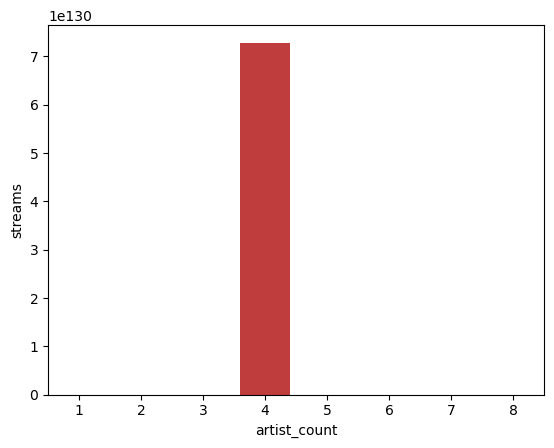

In [71]:
# graph correlation between artist count & streams
print(df["artist_count"])
print(df["streams"])
# average artist_count per stream
modified_df = df.groupby("artist_count")['streams'].mean().reset_index()
print(modified_df)
sns.barplot(x="artist_count", y="streams", data=modified_df)

<Axes: xlabel='danceability_%', ylabel='energy_%'>

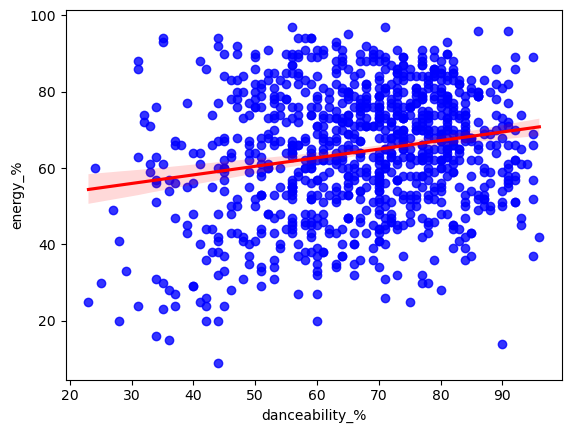

In [56]:
# Correlation between danceability and energy

# print(df["danceability_%"])
# print(df["energy_%"])
# plot regression line with line in a different color then the points
sns.regplot(x="danceability_%", y="energy_%", data=df, scatter=True, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

# Correlation between month and streams

In [52]:
# print df["streams"] type
print(df["streams"].dtype)

# create new column avg_streams that finds the average streams per month
df.groupby("released_month")['streams'].mean()
print(df["avg_streams"])
# plot the average streams per month
sns.barplot(x="released_month", y="avg_streams", data=df)



object


KeyError: 'avg_streams'